O objetivo do presente trabalho consistem verificar quais empresas de PEPs (Pessoas Politicamente Expostas) que receberam recursos dos próprios municípios em que têm mandatos.

Para isso serão utilizado dados do Portal de Transparência Municipal do TCESP, base de dados públicos de CNPJ da SRF e dados do Portal da Transparência da CGU.

**Atenção:** Como o presente trabalho é para fins educacionais, os nomes, CPFs e CNPJs foram alterados, mas as estruturas são idênticas às das tabelas originais.

# Importar as bibliotecas utilizadas

In [1]:
import os
import shutil

import folium
import pandas as pd
import sqlalchemy
import seaborn as sns

# Carregar Dados

In [2]:
diretorio_dados = 'dados'

## Carregar dados de banco

O banco de dados possui três tabelas: despesas_consolidado, empresas e sócios

In [3]:
arquivo_sqlite = 'banco_trabalho06.db'
filepath_arquivo_sqlite = os.path.join(diretorio_dados, arquivo_sqlite)

In [4]:
url_banco = "sqlite:///{}".format(filepath_arquivo_sqlite)
engine = sqlalchemy.create_engine(url_banco)

### Despesas 
É a totalização de valores pagos a empresas por município, valores aproximadamente acima de 100 mil reais.

A consolidação foi realizada a partir da tabela despesas do TCE/SP. Os nomes de empresas, cnpjs e municípios foram alterados.

A coluna **ds_municipio** é o nome do município fictício, **nr_identificador_despesa** o CNPJ da empresa que recebeu o valor da coluna soma e **ds_despesa** a razão social fictícia da empresa.

Os dados originais podem ser obtidos em: https://transparencia.tce.sp.gov.br/conjunto-de-dados

In [5]:
sql = 'SELECT * FROM despesas_consolidado'
despesas = pd.read_sql(sql, engine, index_col=None)

Aqui podemos visualizar uma amostra dos dados

In [6]:
despesas.sample(5)

,ds_municipio,nr_identificador_despesa,ds_despesa,soma
7964,LUND,01488263000192,ZALAN AMBIENTAL SA,475913.69
9997,CATANIO,50889774000128,CHIARA COMUNICACAO EPP,391517.82
18279,SALMAZZO,08571215000111,SUZANNE COMERCIO EIRELLI,168479.45
20241,CAIMAR,05253198000168,MANATO AGROPECUARIA,134301.00
2546,POURBAIX,67592103000963,IGOR SUPERMERCADO SA,1845633.76


Com o comando abaixo, podemos ver que a tabela possui 25.885 registros; não possui dados nulos e há apenas uma coluna com dados numéricos.

In [7]:
despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25885 entries, 0 to 25884
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ds_municipio              25885 non-null  object 
 1   nr_identificador_despesa  25885 non-null  object 
 2   ds_despesa                25885 non-null  object 
 3   soma                      25885 non-null  float64
dtypes: float64(1), object(3)
memory usage: 809.0+ KB


#### Múnicipios Únicos

In [8]:
municipios_sao_paulo = 645
quantidade_municipios_unicos = len(despesas['ds_municipio'].unique())
proporcao = round(quantidade_municipios_unicos/municipios_sao_paulo*100,1)

print('O estado de São Paulo possui {} municipios'.format(municipios_sao_paulo))
print('A amostra utilizada, possui {} municipios unicos'.format(quantidade_municipios_unicos))
print('Representando {}% dos municipios de SP'.format(proporcao))

O estado de São Paulo possui 645 municipios
A amostra utilizada, possui 644 municipios unicos
Representando 99.8% dos municipios de SP


#### Distribuição Despesas Município

[Text(0.5, 0, 'Despesas'), Text(0, 0.5, 'Contagem')]

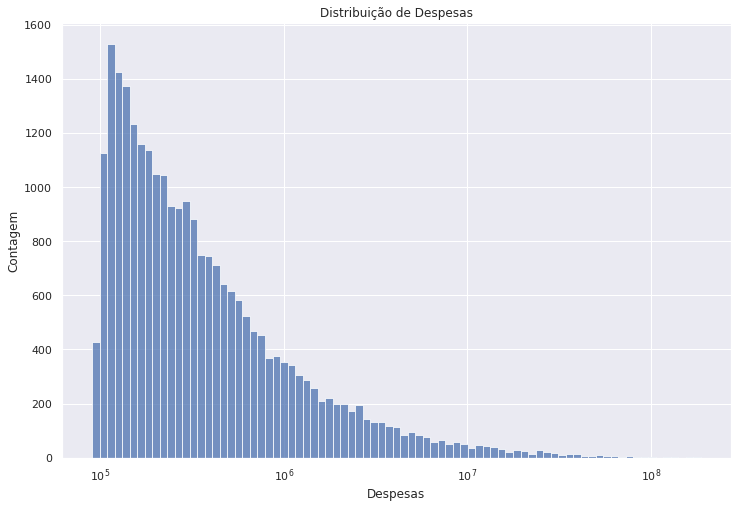

In [9]:
sns.set(rc={'figure.figsize':(12, 8)})

ax = sns.histplot(despesas, x='soma', log_scale=True)

ax.set(title='Distribuição de Despesas')
ax.set(xlabel='Despesas', ylabel='Contagem')

#### Municípios Que Mais Gastaram

In [10]:
municipios_despesas = despesas.groupby('ds_municipio').sum()
municipios_despesas = municipios_despesas.sort_values('soma', ascending=False)
top_10_municipio_despesas = municipios_despesas.head(10).reset_index()

In [11]:
top_10_municipio_despesas

,ds_municipio,soma
0,ROZARIO,1.223180e+09
1,DALAGO,9.643243e+08
2,HELFER,9.434388e+08
3,ZACCAI,9.342326e+08
4,HOLZBACH,7.990991e+08
5,PROITE,7.534733e+08
6,POVINHA,7.382816e+08
7,PATELLI,6.120559e+08
8,MARTEL,6.112997e+08
9,KANDELMAN,5.709025e+08


[Text(0.5, 0, 'Despesas'), Text(0, 0.5, 'Município')]

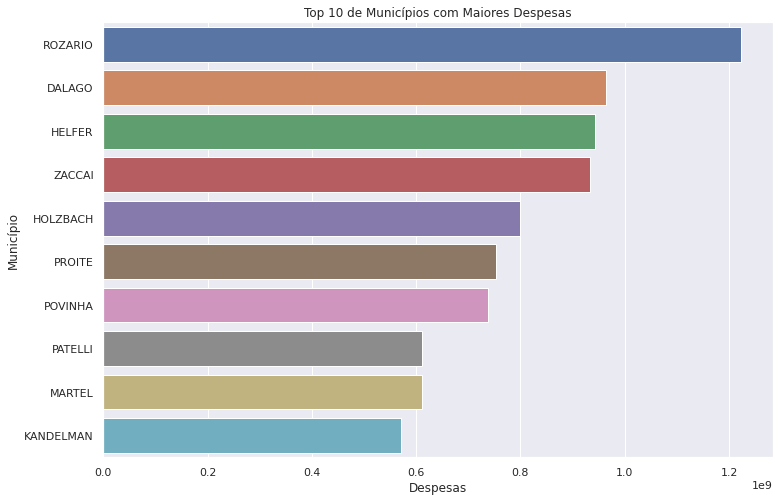

In [12]:
ax = sns.barplot(data=top_10_municipio_despesas, x='soma', y='ds_municipio')

ax.set(title='Top 10 de Municípios com Maiores Despesas')
ax.set(xlabel='Despesas', ylabel='Município')

### Empresas 
Tabela de empresas da receita federal.

Possui dados alterados, mas a estrutura das colunas é semelhante a base pública da Receita Federal.

In [13]:
sql = 'SELECT * FROM empresas'
empresas = pd.read_sql(sql, engine, index_col=None)

Aqui podemos visualizar uma amostra dos dados

In [14]:
empresas.sample(5)

,cnpj,matriz_filial,razao_social,nome_fantasia,situacao,data_situacao,motivo_situacao,nm_cidade_exterior,cod_pais,nome_pais,...,email,qualif_resp,capital_social,porte,opc_simples,data_opc_simples,data_exc_simples,opc_mei,sit_especial,data_sit_especial
4017,22373705000199,1,MADISON EQUIPAMENTOS EIRELLI,,02,20200101,00,,,,...,,,0.000000e+00,05,0,,,N,,
2704,02664857000151,1,JANNIK IMOBILIARIA,,02,20200101,00,,,,...,,,0.000000e+00,05,0,,,N,,
2830,25066995000125,1,LIONEL INCORPORADORA EIRELLI,,02,20200101,00,,,,...,,,7.332226e+06,01,5,,,N,,
1109,17611691000119,1,BIBORKA COSMETICOS,,02,20200101,01,,,,...,,,9.165282e+05,05,0,,,N,,
1786,08369911000148,1,NANA ESPORTIVOS,,02,20200101,00,,,,...,,,7.332226e+06,01,5,,,N,,


Com o comando abaixo, podemos ver que a tabela possui 5.779 registros; não possui dados nulos e há apenas uma coluna com dados numéricos.

In [15]:
empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cnpj                5779 non-null   object 
 1   matriz_filial       5779 non-null   object 
 2   razao_social        5779 non-null   object 
 3   nome_fantasia       5779 non-null   object 
 4   situacao            5779 non-null   object 
 5   data_situacao       5779 non-null   object 
 6   motivo_situacao     5779 non-null   object 
 7   nm_cidade_exterior  5779 non-null   object 
 8   cod_pais            5779 non-null   object 
 9   nome_pais           5779 non-null   object 
 10  cod_nat_juridica    5779 non-null   object 
 11  data_inicio_ativ    5779 non-null   object 
 12  cnae_fiscal         5779 non-null   object 
 13  tipo_logradouro     5779 non-null   object 
 14  logradouro          5779 non-null   object 
 15  numero              5779 non-null   object 
 16  comple

#### Sócios
Tabela de sócios da receita federal.

Possui dados alterados, mas a estrutura das colunas é semelhante a base pública da Receita Federal.

Os dados originais podem ser obtidos em: https://www.gov.br/receitafederal/pt-br/assuntos/orientacao-tributaria/cadastros/consultas/dados-publicos-cnpj

In [16]:
sql = 'SELECT * FROM socios'
socios = pd.read_sql(sql, engine, index_col=None)

Aqui podemos visualizar uma amostra dos dados

In [17]:
socios.sample(5)

,cnpj,tipo_socio,nome_socio,cnpj_cpf_socio,cod_qualificacao,perc_capital,data_entrada,cod_pais_ext,nome_pais_ext,cpf_repres,nome_repres,cod_qualif_repres
5464,27806084000177,2,SIVAL SARGE,***634968**,49,0.0,20200101,,,,,00
1313,14567185000378,2,MANZIN CAUME DE MAMADI,***122008**,59,0.0,20200101,,,,,00
3632,13000032000197,2,LAERTE RUITA IASSIM,***499408**,49,0.0,20200101,,,,,00
4917,13722521000116,2,EDENICIO SHYLENE COOPE,***449298**,59,0.0,20200101,,,,,00
2501,13783359000530,2,HELIO RUSHANSKY CORAT,***331538**,59,0.0,20200101,,,,,00


Com o comando abaixo, podemos ver que a tabela possui 5.825 registros; não possui dados nulos e há apenas uma coluna com dados numéricos.

In [18]:
socios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825 entries, 0 to 5824
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cnpj               5825 non-null   object 
 1   tipo_socio         5825 non-null   object 
 2   nome_socio         5825 non-null   object 
 3   cnpj_cpf_socio     5825 non-null   object 
 4   cod_qualificacao   5825 non-null   object 
 5   perc_capital       5825 non-null   float64
 6   data_entrada       5825 non-null   object 
 7   cod_pais_ext       5825 non-null   object 
 8   nome_pais_ext      5825 non-null   object 
 9   cpf_repres         5825 non-null   object 
 10  nome_repres        5825 non-null   object 
 11  cod_qualif_repres  5825 non-null   object 
dtypes: float64(1), object(11)
memory usage: 546.2+ KB


## Carregar dados de Pessoas Expostas Politicamente
As Pessoas Expostas Politicamente são os agentes públicos que desempenham ou tenham desempenhado, nos cinco anos anteriores, no Brasil ou em países, territórios e dependências estrangeiros, cargos, empregos ou funções públicas relevantes, assim como seus representantes, familiares e outras pessoas de seu relacionamento próximo.

Possui dados alterados, mas a estrutura das colunas é semelhante a base pública do Portal da Transparência.

O arquivo original pode ser obtido em http://www.portaldatransparencia.gov.br/download-de-dados/pep

In [19]:
arquivo_peps = 'PEP_SP.csv'
filepath_arquivo_pep = os.path.join(diretorio_dados, arquivo_peps)

In [20]:
peps = pd.read_csv(filepath_arquivo_pep, sep=';')

Aqui podemos visualizar uma amostra dos dados

In [21]:
peps.sample(5)

,CPF,Nome_PEP,Sigla_Função,Descrição_Função,Nível_Função,Nome_Órgão,Data_Início_Exercício,Data_Fim_Exercício,Data_Fim_Carência,uf_orgao
3482,***.438.918-**,ZANOLINE YANKOUS DIGEZIO DE GIDEONY,VEREAD,VEREADOR,NaN,MUN. DE COSANDEY-SP,01/01/2017,31/12/2020,31/12/2025,SP
979,***.123.248-**,NEIDE JODA LANUZIA PENUELA CHIMANGO,VEREAD,VEREADOR,NaN,MUN. DE MENERES-SP,01/01/2017,31/12/2020,31/12/2025,SP
6307,***.814.438-**,MICHEL BRANCIFORTE ACHINELIS,VEREAD,VEREADOR,NaN,MUN. DE ABECASSIS-SP,01/01/2017,31/12/2020,31/12/2025,SP
1964,***.240.058-**,DELU SETTIMI,VEREAD,VEREADOR,NaN,MUN. DE BEZERR-SP,01/01/2017,31/12/2020,31/12/2025,SP
5387,***.697.298-**,MILTON MARGENTE DA SUSAKO,VEREAD,VEREADOR,NaN,MUN. DE CAPELLESSO-SP,01/01/2017,31/12/2020,31/12/2025,SP


Com o comando abaixo, podemos ver que a tabela possui 7.690 registros; possui apenas o coluna **Nível_Função** com dados nulos.

In [22]:
peps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7690 entries, 0 to 7689
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CPF                    7690 non-null   object 
 1   Nome_PEP               7690 non-null   object 
 2   Sigla_Função           7690 non-null   object 
 3   Descrição_Função       7690 non-null   object 
 4   Nível_Função           0 non-null      float64
 5   Nome_Órgão             7690 non-null   object 
 6   Data_Início_Exercício  7690 non-null   object 
 7   Data_Fim_Exercício     7690 non-null   object 
 8   Data_Fim_Carência      7690 non-null   object 
 9   uf_orgao               7690 non-null   object 
dtypes: float64(1), object(9)
memory usage: 600.9+ KB


# Execução

In [23]:
# Definir diretorio saida
diretorio_saida_dados = 'saida'

# Remover diretorio saida, se houver
shutil.rmtree(diretorio_saida_dados, ignore_errors=True)

# Criar diretorio saida
os.makedirs(diretorio_saida_dados, exist_ok=True)

## Tratamento dos dados

Alguns dados precisam ser tratados antes da análise.

### Empresa

A coluna **data_situacao** está no formato YYYMMDD, para facilitar a análise, vamos criar a coluna **data_situacao_normalizado** com o formato YYYY-MM-DD

In [24]:
empresas['data_situacao'].sample(5)

3489    20200101
924     20200101
2296    20200101
1352    20200101
2946    20200101
Name: data_situacao, dtype: object

In [25]:
empresas['data_situacao_normalizado'] = pd.to_datetime(empresas['data_situacao']).dt.date

In [26]:
empresas['data_situacao_normalizado'].sample(5)

3668    2020-01-01
2825    2020-01-01
3416    2020-01-01
3384    2020-01-01
5035    2020-01-01
Name: data_situacao_normalizado, dtype: object

### Socios

A coluna **data_entrada** está no formato YYYMMDD, para facilitar a análise, vamos criar a coluna **data_entrada_normalizado** com o formato YYYY-MM-DD

In [27]:
socios['data_entrada'].sample(5)

4867    20200101
1057    20200101
5659    20200101
2353    20200101
5629    20200101
Name: data_entrada, dtype: object

In [28]:
socios['data_entrada_normalizado'] = pd.to_datetime(socios['data_entrada']).dt.date

In [29]:
socios['data_entrada_normalizado'].sample(5)

1220    2020-01-01
4327    2020-01-01
1065    2020-01-01
4471    2020-01-01
1507    2020-01-01
Name: data_entrada_normalizado, dtype: object

### Pessoas Politicamente Expostas

A coluna **CPF** possuem pontuação, vamos criar a coluna **CPF_normalizado** sem elas.

In [30]:
peps['CPF'].sample(5)

2572    ***.314.458-**
3168    ***.391.178-**
6553    ***.850.358-**
4030    ***.515.838-**
4155    ***.530.108-**
Name: CPF, dtype: object

In [31]:
peps['CPF_normalizado'] = peps['CPF'].str.replace(".", "", regex=False).str.replace("-", "", regex=False)

In [32]:
peps['CPF_normalizado'].sample(5)

4940    ***638528**
2992    ***364378**
6826    ***888478**
2163    ***267098**
6164    ***796278**
Name: CPF_normalizado, dtype: object

Na coluna **Nome_Órgão** vamos filtrar dados extras e manter apenas o nome do município na coluna **Municipio_normalizado**

In [33]:
peps['Nome_Órgão'].sample(5)

546     MUN. DE SHIHONMATSU-SP
1084         MUN. DE CAIMAR-SP
3461            MUN. DE MOO-SP
7633     MUN. DE SCHIAVETTI-SP
4991        MUN. DE KOVALIK-SP
Name: Nome_Órgão, dtype: object

In [34]:
peps['Municipio_normalizado'] = peps['Nome_Órgão'].str.replace("MUN. DE ", "", regex=False).str.replace("-SP", "", regex=False)

In [35]:
peps['Municipio_normalizado'].sample(5)

2891         DALAGO
4448        ARNEIRO
3947    CASTALDELLI
57           MORIBE
1887    POKRIWIECKI
Name: Municipio_normalizado, dtype: object

As coluna **Data_Início_Exercício**, **Data_Fim_Exercício** e **Data_Fim_Carência** estão no formato YYYY/MM/DD, para facilitar a análise, vamos criar a colunas **Data_Inicio_Exercicio_normalizado**, **Data_Fim_Exercicio_normalizado** e **Data_Fim_Carência_normalizado** com o formato YYYY-MM-DD

In [36]:
peps['Data_Início_Exercício'].sample(5)

6762    01/01/2017
6520    01/01/2017
1523    01/01/2017
5499    01/01/2017
560     01/01/2017
Name: Data_Início_Exercício, dtype: object

In [37]:
peps['Data_Fim_Exercício'].sample(5)

5162    31/12/2020
3492    31/12/2020
2097    31/12/2020
1140    31/12/2020
7032    31/12/2020
Name: Data_Fim_Exercício, dtype: object

In [38]:
peps['Data_Fim_Carência'].sample(5)

6840    31/12/2025
5675    31/12/2025
676     31/12/2025
3002    31/12/2025
297     31/12/2025
Name: Data_Fim_Carência, dtype: object

In [39]:
peps['Data_Inicio_Exercicio_normalizado'] = pd.to_datetime(peps['Data_Início_Exercício']).dt.date
peps['Data_Fim_Exercicio_normalizado'] = pd.to_datetime(peps['Data_Fim_Exercício']).dt.date
peps['Data_Fim_Carência_normalizado'] = pd.to_datetime(peps['Data_Fim_Carência']).dt.date

In [40]:
peps['Data_Inicio_Exercicio_normalizado'].sample(5)

490     2017-01-01
786     2017-01-01
3409    2017-01-01
7460    2017-01-01
4994    2017-01-01
Name: Data_Inicio_Exercicio_normalizado, dtype: object

In [41]:
peps['Data_Fim_Exercicio_normalizado'].sample(5)

6332    2020-12-31
1072    2020-12-31
1284    2020-12-31
3702    2020-12-31
4808    2020-12-31
Name: Data_Fim_Exercicio_normalizado, dtype: object

In [42]:
peps['Data_Fim_Carência_normalizado'].sample(5)

5719    2025-12-31
2875    2025-12-31
4945    2025-12-31
1129    2025-12-31
5709    2025-12-31
Name: Data_Fim_Carência_normalizado, dtype: object

## Gerar Banco de Dados

### Copiar banco original para diretorio de saida

In [43]:
arquivo_banco_saida = 'output.db'
filepath_arquivo_banco_saida = os.path.join(diretorio_saida_dados, arquivo_banco_saida)
shutil.copyfile(filepath_arquivo_sqlite, filepath_arquivo_banco_saida)

'saida/output.db'

### Gravar tabela de prefeitos_vereadores em banco gerado

In [44]:
url_banco = "sqlite:///{}".format(filepath_arquivo_banco_saida)
engine_banco_saida = sqlalchemy.create_engine(url_banco)

In [45]:
peps.to_sql('peps', con=engine_banco_saida)

## Consultar Empresas Relacionadas com Pessoas Politicamente Expostas que Receberam Recursos

In [46]:
sql = 'SELECT \
  des.ds_municipio AS [Nome_Municipio_Ficticio], \
  des.nr_identificador_despesa AS [CNPJ_Empresa_Beneficiaria], \
  des.ds_despesa AS [Razao_Social_Empresa_Beneficiaria], \
  des.soma AS [Valor_Total], \
  emp.cnpj AS [CNPJ_RFB], \
  emp.razao_social AS [Razao_Social_RFB], \
  CASE emp.situacao \
    WHEN "01" THEN "NULA" \
    WHEN "02" THEN "ATIVA" \
    WHEN "03" THEN "SUSPENSA" \
    WHEN "04" THEN "INAPTA" \
    WHEN "08" THEN "BAIXADA" \
  END AS [Situacao_Cadastral_RFB], \
  CAST(emp.data_situacao AS DATE) AS [Data_Situacao_Cadastral_RFB], \
  emp.cod_nat_juridica AS [Codigo_Natureza_Juridica_RFB], \
  CAST(emp.data_inicio_ativ AS DATE) AS [Data_Inicio_Atividade_RFB], \
  emp.cnae_fiscal AS [CNAE_Fiscal_RFB], \
  emp.municipio AS [Municipio_RFB], \
  emp.uf AS [UF_RFB], \
  soc.nome_socio AS [Nome_Socio_RFB], \
  soc.cnpj_cpf_socio AS [CPF_Socio_RFB], \
  CAST(soc.data_entrada AS DATE) AS [Data_Entrada_Socio_RFB], \
  pep.Nome_PEP AS [Nome_PEP], \
  pep.CPF_normalizado AS [CPF_PEP], \
  pep.Descrição_Função AS [Funcao_PEP], \
  pep.Data_Inicio_Exercicio_normalizado AS [Data_Inicio_PEP], \
  pep.Data_Fim_Exercicio_normalizado AS [Data_Fim_PEP], \
  pep.Data_Fim_Carência_normalizado AS [Data_Carencia_PEP], \
  pep.Municipio_normalizado AS [Municipio_PEP], \
  pep.uf_orgao AS [UF_PEP] \
FROM despesas_consolidado des \
JOIN empresas emp ON emp.cnpj = des.nr_identificador_despesa \
JOIN socios soc ON soc.cnpj = emp.cnpj \
JOIN peps pep ON pep.CPF_normalizado = soc.cnpj_cpf_socio AND pep.Nome_PEP = soc.nome_socio'

In [47]:
empresas_peps = pd.read_sql(sql, engine_banco_saida, index_col=None)

In [48]:
empresas_peps.sample(5)

,Nome_Municipio_Ficticio,CNPJ_Empresa_Beneficiaria,Razao_Social_Empresa_Beneficiaria,Valor_Total,CNPJ_RFB,Razao_Social_RFB,Situacao_Cadastral_RFB,Data_Situacao_Cadastral_RFB,Codigo_Natureza_Juridica_RFB,Data_Inicio_Atividade_RFB,...,CPF_Socio_RFB,Data_Entrada_Socio_RFB,Nome_PEP,CPF_PEP,Funcao_PEP,Data_Inicio_PEP,Data_Fim_PEP,Data_Carencia_PEP,Municipio_PEP,UF_PEP
28,SITA,49524688000199,IBAI VESTUARIO,339078.90,49524688000199,IBAI VESTUARIO,ATIVA,20200101,2038,20201019,...,***460278**,20200101,SAVIOLO LUYTEN SMERIERI,***460278**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,SITA,SP
47,BUSSAMRA,59442647000146,LOUISE ADMINISTRATIVOS,178798.02,59442647000146,LOUISE ADMINISTRATIVOS,ATIVA,20200101,3999,19891126,...,***853118**,20200101,BENJAMIM HOSCHITAKE OBERLEITENER DE MOLIMAROLI,***853118**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,NIRAZAWA,SP
24,HANDA,07815964000138,AMINE LIMPEZA EPP,425778.13,07815964000138,AMINE LIMPEZA EPP,ATIVA,20200101,2305,20200127,...,***396958**,20200101,FABIO MUSSY DE BOYDE,***396958**,VEREADOR,2017-01-01,2020-12-31,2025-12-31,VIJARVA,SP
64,MILLNITZ,12480500000115,VICENTE MODAS,131687.01,12480500000115,VICENTE MODAS,BAIXADA,20200101,2305,20140218,...,***178358**,20200101,JOAO YPEI DE KAARA,***178358**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,GAZETA,SP
9,COSLOVSKY,55815300000213,AMINE IMOBILIARIOS,747635.06,55815300000213,AMINE IMOBILIARIOS,ATIVA,20200101,3999,19870728,...,***890658**,20200101,AMARILDO SABATE KAILER,***890658**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,SOLIZ,SP


### Salvar dados

In [49]:
arquivo_saida = 'empresas_peps.csv'
filepath = os.path.join(diretorio_saida_dados, arquivo_saida)
empresas_peps.to_csv(filepath, index=False)

## Consultar Empresas Relacionadas com Pessoas Politicamente Expostas que Receberam Recursos dos Municípios que Possuem Mandatos

In [50]:
empresas_peps_mesmo_municipio = empresas_peps[empresas_peps['Municipio_PEP'] == empresas_peps['Nome_Municipio_Ficticio']]

In [51]:
empresas_peps_mesmo_municipio.shape

(11, 24)

In [52]:
empresas_peps_mesmo_municipio.sample(5)

,Nome_Municipio_Ficticio,CNPJ_Empresa_Beneficiaria,Razao_Social_Empresa_Beneficiaria,Valor_Total,CNPJ_RFB,Razao_Social_RFB,Situacao_Cadastral_RFB,Data_Situacao_Cadastral_RFB,Codigo_Natureza_Juridica_RFB,Data_Inicio_Atividade_RFB,...,CPF_Socio_RFB,Data_Entrada_Socio_RFB,Nome_PEP,CPF_PEP,Funcao_PEP,Data_Inicio_PEP,Data_Fim_PEP,Data_Carencia_PEP,Municipio_PEP,UF_PEP
15,KNOLL,18941225000172,CSENGE CONFECCOES EIRELLI,555209.93,18941225000172,CSENGE CONFECCOES EIRELLI,ATIVA,20200101,2232,20120324,...,***969658**,20200101,JUNOR RUITA CHIMANGO,***969658**,VEREADOR,2017-01-01,2020-12-31,2025-12-31,KNOLL,SP
69,ASSUB,49524688000199,IBAI VESTUARIO,113162.42,49524688000199,IBAI VESTUARIO,ATIVA,20200101,2038,20201019,...,***271878**,20200101,JAIME BONAVOGLIA DA TEVEIRA,***271878**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,ASSUB,SP
52,ROZARIO,08262075000137,MARIUS CONTABIL EIRELLI,135193.38,08262075000137,MARIUS CONTABIL EIRELLI,BAIXADA,20200101,3999,20030308,...,***341758**,20200101,GOSSON LEGNANNE GONDOREK,***341758**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,ROZARIO,SP
41,BREIA,10240793000137,JOAO LUCAS ELETRONICOS SA,225281.82,10240793000137,JOAO LUCAS ELETRONICOS SA,ATIVA,20200101,3999,20130111,...,***502138**,20200101,CAUME UNAIDE ABASILIA PHREDERICO ZIELAK,***502138**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,BREIA,SP
54,SACCOL,06273922000124,MOMOKA ARTISTICAS LTDA,141497.58,06273922000124,MOMOKA ARTISTICAS LTDA,ATIVA,20200101,3999,20000214,...,***923478**,20200101,GEOVANISA TERSINHA BERTASSONI,***923478**,PREFEITO,2017-01-01,2020-12-31,2025-12-31,SACCOL,SP


### Salvar dados

In [53]:
arquivo_saida = 'empresas_peps_mesmo_municipio.csv'
filepath = os.path.join(diretorio_saida_dados, arquivo_saida)
empresas_peps_mesmo_municipio.to_csv(filepath, index=False)

# Visualização

## Mapa de Localização de Empresas relacionadas à PEPs

In [54]:
arquivo_municipios = 'Municipios_SP_paridade.csv'
filepath_arquivo_municipios = os.path.join(diretorio_dados, arquivo_municipios)

In [55]:
municipios = pd.read_csv(filepath_arquivo_municipios, sep='|')

In [56]:
empresas_peps_coord = pd.merge(empresas_peps, municipios, how="inner", left_on='Nome_Municipio_Ficticio', right_on='Municipio_ficticio')

In [57]:
empresas_peps_coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nome_Municipio_Ficticio            73 non-null     object 
 1   CNPJ_Empresa_Beneficiaria          73 non-null     object 
 2   Razao_Social_Empresa_Beneficiaria  73 non-null     object 
 3   Valor_Total                        73 non-null     float64
 4   CNPJ_RFB                           73 non-null     object 
 5   Razao_Social_RFB                   73 non-null     object 
 6   Situacao_Cadastral_RFB             73 non-null     object 
 7   Data_Situacao_Cadastral_RFB        73 non-null     int64  
 8   Codigo_Natureza_Juridica_RFB       73 non-null     object 
 9   Data_Inicio_Atividade_RFB          73 non-null     int64  
 10  CNAE_Fiscal_RFB                    73 non-null     object 
 11  Municipio_RFB                      73 non-null     object 
 

In [58]:
empresas_peps_coord.sample(5)

,Nome_Municipio_Ficticio,CNPJ_Empresa_Beneficiaria,Razao_Social_Empresa_Beneficiaria,Valor_Total,CNPJ_RFB,Razao_Social_RFB,Situacao_Cadastral_RFB,Data_Situacao_Cadastral_RFB,Codigo_Natureza_Juridica_RFB,Data_Inicio_Atividade_RFB,...,Municipio_PEP,UF_PEP,ID,IBGE_7,IBGE_6,Municipio_real,UF,Latitude,Longitude,Municipio_ficticio
48,NIELAND,06273922000124,MOMOKA ARTISTICAS LTDA,195474.65,06273922000124,MOMOKA ARTISTICAS LTDA,ATIVA,20200101,3999,20000214,...,SACCOL,SP,426,3537800,353780,PIEDADE,SP,-23.712,-47.428,NIELAND
47,DALO,10240793000137,JOAO LUCAS ELETRONICOS SA,221294.85,10240793000137,JOAO LUCAS ELETRONICOS SA,ATIVA,20200101,3999,20130111,...,BREIA,SP,182,3515806,351580,FLORA RICA,SP,-21.676,-51.384,DALO
13,CAVICHIOLI,55815300000475,AMINE IMOBILIARIOS,139074.12,55815300000475,AMINE IMOBILIARIOS,ATIVA,20200101,3999,20111019,...,SOLIZ,SP,132,3511607,351160,CESARIO LANGE,SP,-23.227,-47.953,CAVICHIOLI
58,CLARETO,10240793000137,JOAO LUCAS ELETRONICOS SA,135392.02,10240793000137,JOAO LUCAS ELETRONICOS SA,ATIVA,20200101,3999,20130111,...,BREIA,SP,160,3514403,351440,DRACENA,SP,-21.483,-51.533,CLARETO
71,ASSUB,49524688000199,IBAI VESTUARIO,113162.42,49524688000199,IBAI VESTUARIO,ATIVA,20200101,2038,20201019,...,SITA,SP,36,3503158,350315,ARAPEI,SP,-22.674,-44.448,ASSUB


In [59]:
mapa_plot = folium.Map(location=[empresas_peps_coord.Latitude.mean(), empresas_peps_coord.Longitude.mean()], zoom_start=7, control_scale=True)
for index, location_info in empresas_peps_coord.iterrows():
    description = "A empresa " + location_info["Razao_Social_Empresa_Beneficiaria"] + " (CNPJ " + location_info["CNPJ_Empresa_Beneficiaria"] + "), relacionada ao PEP " + location_info["Nome_PEP"] + ", recebeu R$ " + str(location_info["Valor_Total"])
    description.splitlines(True)
    folium.Marker(
        [location_info["Latitude"], location_info["Longitude"]],
        popup=description,
        tooltip=description,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(mapa_plot)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Mapa (fictício) de empresas relacionadas com PEPs</b></h3>
             '''
mapa_plot.get_root().html.add_child(folium.Element(title_html))
mapa_plot